# Task 1 

## 1- Introduction

Data analytics is the collection, transformation, and organization of data to conclude, make predictions, and drive informed decision-making. The data in the file is about student achievement in secondary education at two Portuguese schools. The data attributes include student grades, demographic, social, and school-related features and it was collected using school reports and questionnaires. Therefore, the algorithm used for the machine learning model is based on supervised and there are regression or classification. Classification algorithms utilize input training data to predict the likelihood or probability that the data that follows will fall into one of the predetermined categories.
After loading the data and understanding each variable, I cleaned the data and performed data exploration using visualization. In the next step, I process models to find the best model for this type of output. We have discrete variables that are similar to continuous variables due to the small distance between them. In the end, according to these data, we checked whether by classifying the information, our prediction of students' grades would improve or not and whether the accuracy measurement would be checked. We have discrete variables that are similar to continuous variables due to the small distance between them, and at the end, according to these data, we checked whether by classifying the information, our prediction of students' grades would improve or not, and  we check the accuracy.


## 2. Data Set

### 2.1	student achievement Data set
The dataset is provided in ‘csv’ type. After importing the data set, the first step is getting some information about the shape of the data set and variables.
The data in the file  is about student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.there are 948 rows and 40 Columns.(dtypes: float64(1), int64(18), object(18))*
The features of the raw data set with their corresponding descriptions are as below:


## 3. Data Pre-Processing

in this step we import the main libraries that we need


In [182]:
#| label: import-libraries
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

To use data, we need to import them and read the data. In this case, our data is CSV files, and it is in the folder whose name is data.


In [183]:
#| label: data-import
# Import your data here.
df = pd.read_csv('data\exam_data.csv')
df.head() 

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,absences.Math,G1.Math,G2.Math,G3.Math,failures.Port,paid.Port,absences.Port,G1.Port,G2.Port,G3.Port
0,227.0,GP,M,16,U,GT3,T,1,2,services,...,2,11,12,11,0,no,0,10,9,11
1,361.0,MS,M,18,R,GT3,T,4,2,other,...,14,6,5,5,1,yes,0,7,7,0
2,260.0,GP,M,16,U,LE3,T,2,2,services,...,8,9,9,9,0,no,4,12,11,11
3,267.0,GP,M,17,R,GT3,T,1,3,other,...,20,9,7,8,1,no,14,12,11,11
4,2.0,GP,F,15,R,GT3,T,1,1,other,...,2,8,6,5,0,no,2,13,11,11


In [184]:
#| label: show how many rows and coloumn in data set
df.shape

(948, 40)

In [185]:
#| label: Get inforaion
# getting data on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     948 non-null    float64
 1   school         948 non-null    object 
 2   sex            948 non-null    object 
 3   age            948 non-null    int64  
 4   address        948 non-null    object 
 5   famsize        948 non-null    object 
 6   Pstatus        948 non-null    object 
 7   Medu           948 non-null    int64  
 8   Fedu           948 non-null    int64  
 9   Mjob           948 non-null    object 
 10  Fjob           948 non-null    object 
 11  reason         948 non-null    object 
 12  guardian       948 non-null    object 
 13  traveltime     948 non-null    int64  
 14  studytime      948 non-null    int64  
 15  schoolsup      948 non-null    object 
 16  famsup         948 non-null    object 
 17  activities     948 non-null    object 
 18  nursery   

### 3.1	Data Cleaning

The steps followed for the data set is given below:

#### 3.1.1 Dropping unnecessary columns and rows:

Dropping unnecessary columns and rows is a data preprocessing step that involves removing specific columns or rows from a dataset that are deemed unnecessary for the analysis or modeling task at hand. This process is beneficial for several reasons. Reducing Dimensionality, Improving Computational Efficiency, Enhancing Model Performance, and so on .
At this stage, I check the data, and in this step,  model must contain the variables absences.Port, famsup, Walc, failures.Port, studytime, famrel but not the variables Fedu, Medu, age. 
so I droped the Fedu, Medu, age.


In [186]:
# drop the column on dataset
df.drop('Fedu', axis=1, inplace=True)
df.drop('Medu', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     948 non-null    float64
 1   school         948 non-null    object 
 2   sex            948 non-null    object 
 3   address        948 non-null    object 
 4   famsize        948 non-null    object 
 5   Pstatus        948 non-null    object 
 6   Mjob           948 non-null    object 
 7   Fjob           948 non-null    object 
 8   reason         948 non-null    object 
 9   guardian       948 non-null    object 
 10  traveltime     948 non-null    int64  
 11  studytime      948 non-null    int64  
 12  schoolsup      948 non-null    object 
 13  famsup         948 non-null    object 
 14  activities     948 non-null    object 
 15  nursery        948 non-null    object 
 16  higher         948 non-null    object 
 17  internet       948 non-null    object 
 18  romantic  

#### 3.1.2 Checking for missing values

In most cases, we do not get complete datasets. They either have some values missing from the rows and columns or they do not have standardized values.
So, before going ahead with the analysis, it is a good idea to check whether the dataset has any missing values. 
in this step all data check and there didn’t find any missing value.  


In [187]:
# Drop rows with null values
df = df.dropna()
#df.info()
df.shape

(948, 37)

in this step we check the missing value and there are no missing value anf the row not need to drop.


In [188]:
# Checking for missing values in the entire dataset
missing_values = df.isnull().sum()
# Printing the result
print(missing_values)
df.shape

Unnamed: 0       0
school           0
sex              0
address          0
famsize          0
Pstatus          0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
schoolsup        0
famsup           0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
failures.Math    0
paid.Math        0
absences.Math    0
G1.Math          0
G2.Math          0
G3.Math          0
failures.Port    0
paid.Port        0
absences.Port    0
G1.Port          0
G2.Port          0
G3.Port          0
dtype: int64


(948, 37)

we do not have any value for replacing with missing data if we have ve can replace it or drop it . 


In [189]:
# counting the missing value in case the data set is very big and replace it 
num_missing_values = 0
for column in df.columns:
  for item in df[column].isnull():
    if item == True:
      num_missing_values += 1

num_missing_values

0

#### 	3.1.3 Checking for garbage values

Garbage value is generally a term meaning that the value in a variable doesn't have some sort of planned meaning.
By checking the statistical information of the data, some variables have negative values, and some have 0 values which are not compatible with the definition (corresponding to the dataset).
The detail of these values is given in the following tables:

*** Negative Values and Zero for deleting ***

by this code we can check the data for minus and zero if it is not compatible by the meaning they have.


In [190]:
# get name the columns
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup',
       'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'failures.Math', 'paid.Math', 'absences.Math', 'G1.Math', 'G2.Math',
       'G3.Math', 'failures.Port', 'paid.Port', 'absences.Port', 'G1.Port',
       'G2.Port', 'G3.Port'],
      dtype='object')

In [191]:
# Checking the negative values of studytime
df[df['studytime']<0]['studytime'].value_counts()
df['studytime'].value_counts()

studytime
2    475
1    253
3    160
4     60
Name: count, dtype: int64

In [192]:
# Checking the 0 values of sex
df[df['Walc']==0]['Walc'].value_counts()
df['Walc'].value_counts()

Walc
1    360
2    222
3    187
4    111
5     68
Name: count, dtype: int64

we checked the data , and there are any value of minus and zero so the rows not be changed .

#### 	3.1.4 Checking the distribution of each variable 

Checking the distribution of each variable involves examining the spread and pattern of values within individual columns or features in a dataset. Understanding the distribution helps you gain insights into the central tendencies, variability, and shape of the data. This is crucial for making informed decisions during data analysis and modeling. Common statistical measures used to describe the distribution include mean, median, and standard deviation.

In this phase, first we checked the numeric variables with zero variance (threshold = 0), *they do not have any contribution on the model*.at this data we do not have any standard deviation equal to zero. so this step we didnt drop anything.
only drop some columns such as unnamed ( column1 for indexing ) and some column that in the task announced to drop it such as Grad in port and math.


In [193]:
df = df.drop([ 'G3.Port','G2.Port','G1.Port','G3.Math','G2.Math'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df.head()
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures.Math',
       'paid.Math', 'absences.Math', 'G1.Math', 'failures.Port', 'paid.Port',
       'absences.Port'],
      dtype='object')

check the standard deviation if there are value near the zero , we can delete it . 

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
traveltime,948.0,1.417722,0.680535,1.0,1.0,1.0,2.0,4.0
studytime,948.0,2.028481,0.829900,1.0,1.0,2.0,2.0,4.0
famrel,948.0,3.939873,0.897946,1.0,4.0,4.0,5.0,5.0
freetime,948.0,3.272152,0.969321,1.0,3.0,3.0,4.0,5.0
goout,948.0,3.119198,1.124523,1.0,2.0,3.0,4.0,5.0
Dalc,948.0,1.478903,0.869875,1.0,1.0,1.0,2.0,5.0
Walc,948.0,2.266878,1.273348,1.0,1.0,2.0,3.0,5.0
health,948.0,3.624473,1.392510,1.0,3.0,4.0,5.0,5.0
failures.Math,948.0,0.287975,0.706272,0.0,0.0,0.0,0.0,3.0
absences.Math,948.0,5.290084,7.366354,0.0,0.0,2.0,8.0,75.0


### 3.2 Data Transformation

#### 3.2.1 Transforming the categorical variables

If we have a column that is object for example yes or no question or if we have Boolean, we can convert them to integer.in this stage I created the new column. 
in this step we change type of ‘famsup’ from object to integer for using the model.
Encoding for famsup: 1 for 'yes', 0 for 'no'


In [195]:
# Specify the columns you want to keep
selected_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures.Math',
       'paid.Math', 'absences.Math', 'G1.Math', 'failures.Port', 'paid.Port',
       'absences.Port']

# Create a new DataFrame with only the selected columns
G1Math_df = df[selected_columns]

# Display the new DataFrame
print(G1Math_df)

    school sex address famsize Pstatus      Mjob      Fjob      reason  \
0       GP   M       U     GT3       T  services  services       other   
1       MS   M       R     GT3       T     other     other        home   
2       GP   M       U     LE3       T  services  services  reputation   
3       GP   M       R     GT3       T     other     other      course   
4       GP   F       R     GT3       T     other     other  reputation   
..     ...  ..     ...     ...     ...       ...       ...         ...   
943     GP   F       U     GT3       T     other     other  reputation   
944     GP   F       U     GT3       T    health  services  reputation   
945     GP   M       U     GT3       T  services   teacher      course   
946     GP   M       U     LE3       T     other     other        home   
947     GP   M       U     GT3       T     other     other      course   

    guardian  traveltime  ...  Dalc Walc health failures.Math paid.Math  \
0     mother           1  ...     1 

In [196]:
"""Ordinal Encoding for famsup: 1:yes, 0:no,"""
#using Map Function
G1Math_df = G1Math_df.copy()

# Ordinal Encoding for famsup: 1 for 'yes', 0 for 'no'
ordinal_map = {'yes': 1, 'no': 0}
G1Math_df['famsup'] = G1Math_df['famsup'].map(ordinal_map)
G1Math_df['famsup'] = G1Math_df['famsup'].astype(int)

In [197]:
G1Math_df.info()
#G1Math_df.head()
G1Math_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         948 non-null    object
 1   sex            948 non-null    object
 2   address        948 non-null    object
 3   famsize        948 non-null    object
 4   Pstatus        948 non-null    object
 5   Mjob           948 non-null    object
 6   Fjob           948 non-null    object
 7   reason         948 non-null    object
 8   guardian       948 non-null    object
 9   traveltime     948 non-null    int64 
 10  studytime      948 non-null    int64 
 11  schoolsup      948 non-null    object
 12  famsup         948 non-null    int32 
 13  activities     948 non-null    object
 14  nursery        948 non-null    object
 15  higher         948 non-null    object
 16  internet       948 non-null    object
 17  romantic       948 non-null    object
 18  famrel         948 non-null   

(948, 31)

## 4 Data Exploration

We put our visualization here.

### 4.1 Finding outliers , dummy variable

Finding outliers in a dataset involves identifying data points that significantly differ from the majority of the data. The use of outlier detection methods depends on the type of data and the analysis objective. However, generally, these methods are commonly applied to numerical columns or continuous variables. The reason for this is that the concept of outliers is more definable in continuous variables, and statistical measures such as mean, standard deviation, box plots, can easily be employed for their identification.
for founding the outliers of  discrete and categorical variables we need to find the type of variables are integer or objects . 


In [198]:
G1Math_df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures.Math',
       'paid.Math', 'absences.Math', 'G1.Math', 'failures.Port', 'paid.Port',
       'absences.Port'],
      dtype='object')

In [199]:
intG1Math_df = G1Math_df.select_dtypes(include='integer')
intG1Math_df.columns

Index(['traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port'],
      dtype='object')

we find the outliers and the Q1 , Q3 and compaire it with data and count how much of each independent variable out of this range and recognize and virtualized it . 

**absences.Port**

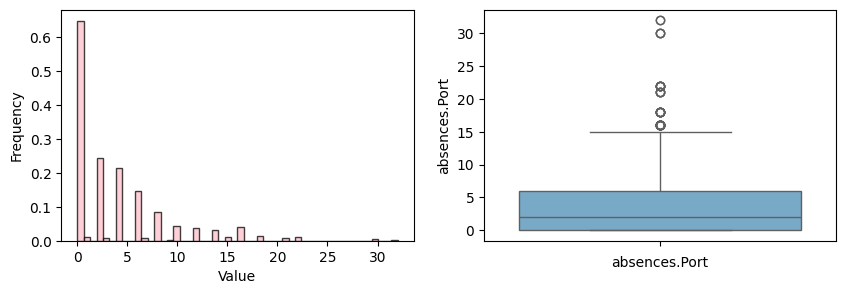

In [200]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['absences.Port']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='absences.Port', data=G1Math_df,palette="Blues")
plt.xlabel('absences.Port')
plt.show()

In [201]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['absences.Port'].quantile(0.25)
Q3 = G1Math_df['absences.Port'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_absences_Port = (df['absences.Port'] < Q1 - 1.5 * IQR) | (df['absences.Port'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_absences_Port  = G1Math_df.loc[outliers_absences_Port, 'absences.Port']
# Display the outlier values
#print("absences.Port :", outliers_absences_Port)

Q1: 0.0
Q3: 6.0
IQR: 6.0
Out1: -9.0
Out2: 15.0


In [202]:
# check the columns we can see outliers
toll_df = G1Math_df.loc[df['absences.Port']>15]
toll_df.shape

(48, 31)

*** famsup ***


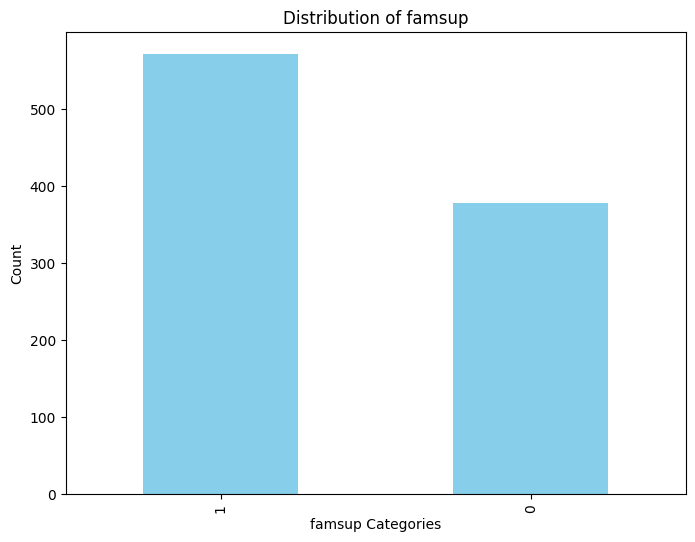

In [203]:
count_table = G1Math_df['famsup'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of famsup')
plt.xlabel('famsup Categories')
plt.ylabel('Count')
plt.show()

In [204]:
G1Math_df['famsup'].value_counts()

famsup
1    571
0    377
Name: count, dtype: int64

*** Walc ***


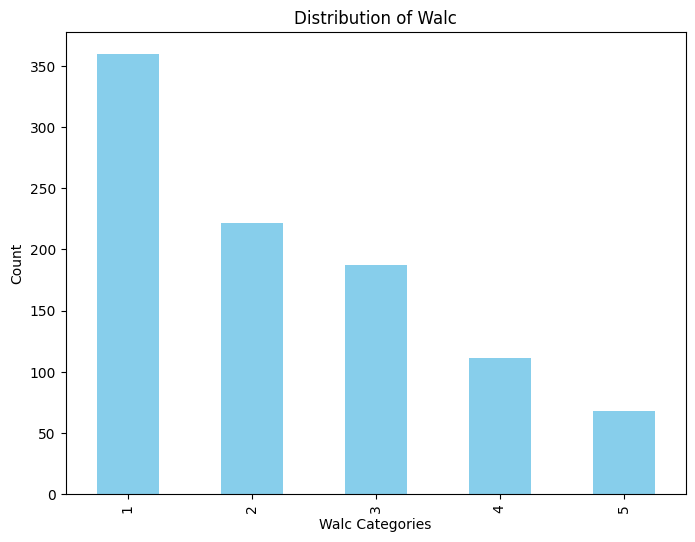

In [205]:
count_table = G1Math_df['Walc'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of Walc')
plt.xlabel('Walc Categories')
plt.ylabel('Count')
plt.show()

In [206]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['Walc'].quantile(0.25)
Q3 = G1Math_df['Walc'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_Walc = (G1Math_df['Walc'] < Q1 - 1.5 * IQR) | (G1Math_df['Walc'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_Walc  = G1Math_df.loc[outliers_Walc, 'Walc']
# Display the outlier values
print("Walc :", outliers_Walc)

Q1: 1.0
Q3: 3.0
IQR: 2.0
Out1: -2.0
Out2: 6.0
Walc : Series([], Name: Walc, dtype: int64)


In [207]:
G1Math_df['Walc'].value_counts()
G1Math_df.shape

(948, 31)

*** failures.Port ***

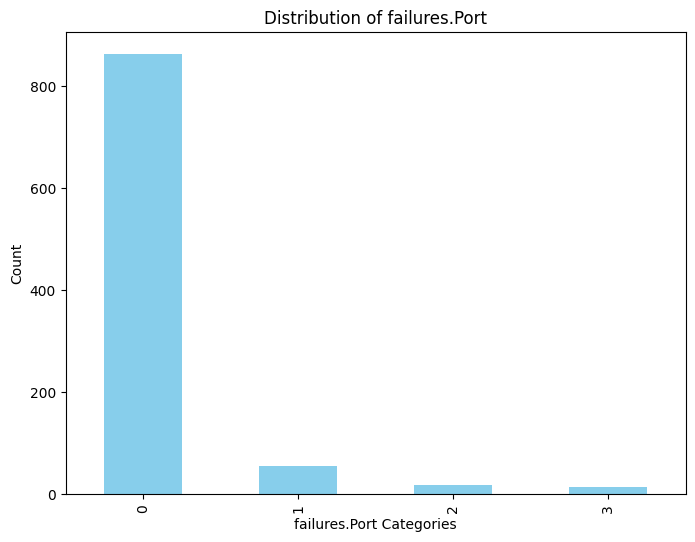

In [208]:
count_table = G1Math_df['failures.Port'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of failures.Port')
plt.xlabel('failures.Port Categories')
plt.ylabel('Count')
plt.show()

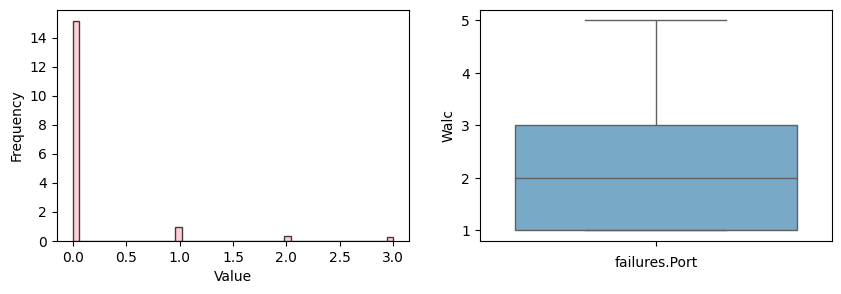

In [209]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['failures.Port']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='Walc', data=G1Math_df,palette="Blues")
plt.xlabel('failures.Port')
plt.show()

In [210]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['failures.Port'].quantile(0.25)
Q3 = G1Math_df['failures.Port'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_failures_Port = (G1Math_df['failures.Port'] < Q1 - 1.5 * IQR) | (G1Math_df['failures.Port'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_failures_Port = G1Math_df.loc[outliers_failures_Port, 'failures.Port']
# Display the outlier values
#print("failures.Port :", outliers_failures_Port)

Q1: 0.0
Q3: 0.0
IQR: 0.0
Out1: 0.0
Out2: 0.0


*** studytime ***

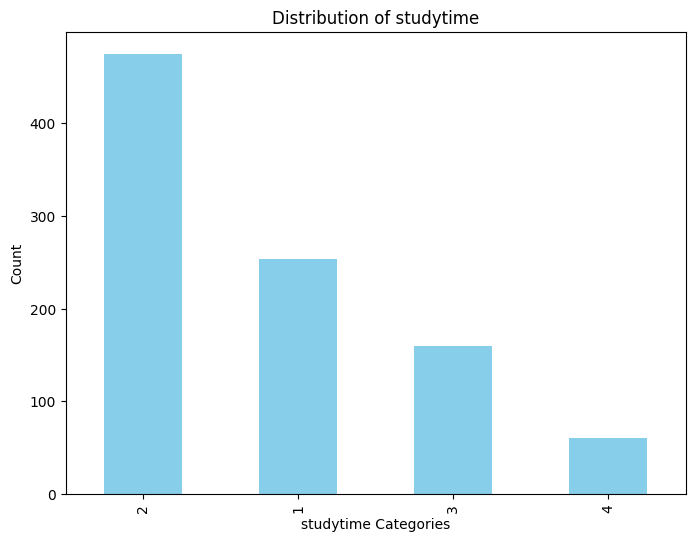

In [211]:
count_table = G1Math_df['studytime'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of studytime')
plt.xlabel('studytime Categories')
plt.ylabel('Count')
plt.show()

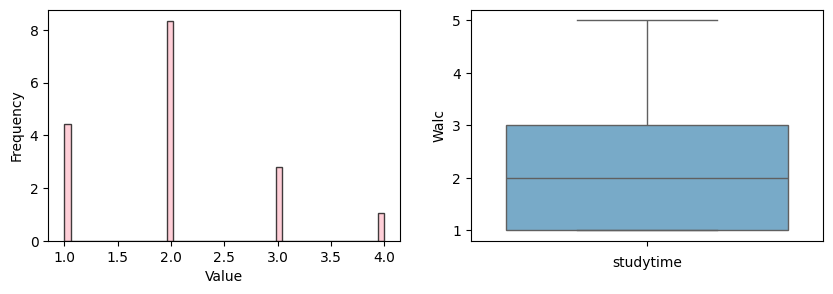

In [212]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['studytime']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='Walc', data=G1Math_df,palette="Blues")
plt.xlabel('studytime')
plt.show()

In [213]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['studytime'].quantile(0.25)
Q3 = G1Math_df['studytime'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_studytime = (G1Math_df['studytime'] < Q1 - 1.5 * IQR) | (G1Math_df['studytime'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_studytime = G1Math_df.loc[outliers_studytime, 'studytime']
# Display the outlier values
#print("failures.Port :", outliers_studytime)

Q1: 1.0
Q3: 2.0
IQR: 1.0
Out1: -0.5
Out2: 3.5


In [214]:
# check the columns we can see outliers
toll3= G1Math_df.loc[df['studytime']<3.5]
toll1 = G1Math_df.loc[df['studytime']>1]
G1Math_df.shape

(948, 31)

In [215]:
G1Math_df['studytime'].value_counts()

studytime
2    475
1    253
3    160
4     60
Name: count, dtype: int64

*** famrel ***

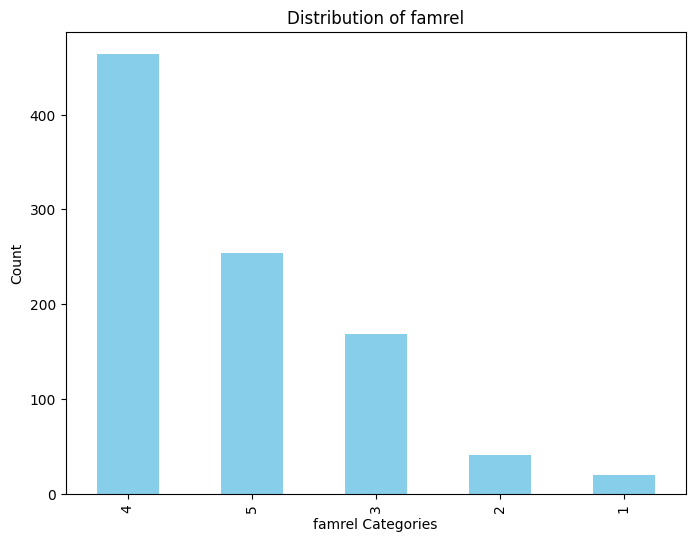

In [216]:
count_table = G1Math_df['famrel'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of famrel')
plt.xlabel('famrel Categories')
plt.ylabel('Count')
plt.show()

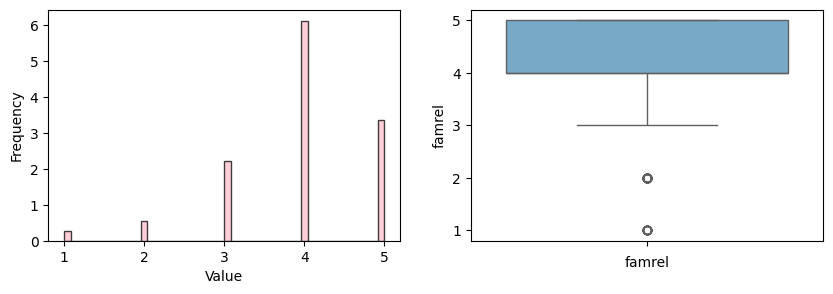

In [217]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['famrel']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='famrel', data=G1Math_df,palette="Blues")
plt.xlabel('famrel')
plt.show()

In [218]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['famrel'].quantile(0.25)
Q3 = G1Math_df['famrel'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_famrel = (G1Math_df['famrel'] < Q1 - 1.5 * IQR) | (G1Math_df['famrel'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_famrel  = G1Math_df.loc[outliers_famrel, 'famrel']
# Display the outlier values
#print("famrel :", outliers_famrel)

Q1: 4.0
Q3: 5.0
IQR: 1.0
Out1: 2.5
Out2: 6.5


In [219]:
# check the columns we can see outliers
toll = G1Math_df.loc[G1Math_df['famrel']>6.5]
toll.shape

(0, 31)

** G1.Math** 

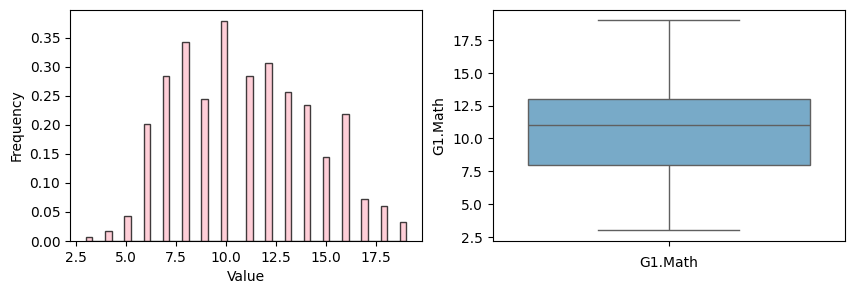

In [220]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['G1.Math']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='G1.Math', data=df,palette="Blues")
plt.xlabel('G1.Math')
plt.show()

In [221]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['G1.Math'].quantile(0.25)
Q3 = G1Math_df['G1.Math'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_famrel = (G1Math_df['G1.Math'] < Q1 - 1.5 * IQR) | (G1Math_df['G1.Math'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_famrel  = G1Math_df.loc[outliers_famrel, 'G1.Math']
# Display the outlier values
#print("famrel :", outliers_famrel)

Q1: 8.0
Q3: 13.0
IQR: 5.0
Out1: 0.5
Out2: 20.5


In [222]:
# check the columns we can see outliers
toll= G1Math_df.loc[df['G1.Math']>23]
toll.shape

(0, 31)

Dummy variables

If we have categorical variables, and we want to fit a linear or logistic regression model, we need to change our categorical variables into dummy variables (using get_dummies or OneHotEncoder).
for finding the corrolation the independent variable should be integer so this step we can check the variables are integer, 

In [223]:
intG1Math_df = G1Math_df.select_dtypes(include='integer')
intG1Math_df.columns

Index(['traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port'],
      dtype='object')

In [224]:
# Checking the linear correlation of variables
df2=G1Math_df[[ 
'traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port']]
corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math          1.000000
studytime        0.135777
famrel           0.037323
freetime         0.010579
health          -0.041466
Dalc            -0.049786
absences.Math   -0.064626
Walc            -0.066664
famsup          -0.070687
traveltime      -0.077825
failures.Port   -0.109396
goout           -0.132199
absences.Port   -0.174703
failures.Math   -0.408430
Name: G1.Math, dtype: float64

before creating dummy variable betwen the variables there are study time with corrolation 0.13 and failours.math :-0,40 and absences.port -0.17  is better the others are integer variables. 
in this step we can drop the other coloumns for managing beter ( we dont drop this columns becouse in the task say that famrel,Walc ,famsup,traveltime,failures.Port,absences.Port)

In [225]:
G1Math_df = G1Math_df.drop([ 'freetime','health','Dalc','absences.Math','traveltime','goout'],axis=1)

In [226]:
G1Math_df.columns
G1Math_df.shape

(948, 25)

this step we have 25 independent variables at the first we have 40 variables . 

the type of the categorical variables are object: 
1-school

In [227]:
"""One_hot encoding for ''school'' """
G1Math_df= pd.get_dummies(G1Math_df, columns = ['school'])

2-sex, 

In [228]:
"""One_hot encoding for 'Sex(Gender)' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['sex'])

3-address

In [229]:
"""One_hot encoding for 'address' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['address'])

4- famsize

In [230]:
"""One_hot encoding for 'famsize' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['famsize'])

5- Pstatus

In [231]:
"""One_hot encoding for 'Pstatus' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['Pstatus'])

6- Mjob

In [232]:
"""One_hot encoding for 'Mjob' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['Mjob'])

7- 'Fjob'

In [233]:
"""One_hot encoding for 'Fjob' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['Fjob'])

8- 'reason'

In [234]:
"""One_hot encoding for 'reason' """
G1Math_df= pd.get_dummies(G1Math_df, columns = ['reason'])

9- 'guardian'


In [235]:
"""One_hot encoding for 'guardian' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['guardian'])

10- 'schoolsup'

In [236]:
"""One_hot encoding for 'schoolsup' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['schoolsup'])

11- 'activities'

In [237]:
"""One_hot encoding for 'activities' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['activities'])

12-'nursery'

In [238]:
"""One_hot encoding for 'nursery' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['nursery'])

13- 'higher'


In [239]:
"""One_hot encoding for 'higher' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['higher'])

14- 'internet'


In [240]:
"""One_hot encoding for 'internet' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['internet'])

15-'romantic'


In [241]:
"""One_hot encoding for 'romantic' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['romantic'])

16-paid.Math


In [242]:
"""One_hot encoding for paid.Math """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['paid.Math'])

17- paid.Port


In [243]:
"""One_hot encoding for 'paid.Port' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['paid.Port'])

In [244]:
#G1Math_df.dtypes
#G1Math_df.info()
#G1Math_df.columns
G1Math_df.shape

(948, 51)

after dummy variable we have 51 columns and the type of them are boolian and again for getting correlation we should be convert them to integer . 


In [245]:
"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['sex_F', 'sex_M', 'school_GP',
       'school_MS', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'paid.Math_no', 'paid.Math_yes', 'paid.Port_no',
       'paid.Port_yes']
G1Math_df[cat_columns] = G1Math_df[cat_columns].astype(int)

In [246]:
G1Math_df.columns
#G1Math_df.info()
#G1Math_df.shape

Index(['studytime', 'famsup', 'famrel', 'Walc', 'failures.Math', 'G1.Math',
       'failures.Port', 'absences.Port', 'school_GP', 'school_MS', 'sex_F',
       'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'paid.Math_no', 'paid.Math_yes', 'paid.Port_no',
       'paid.Port_yes'],
      dtype='object')

In [247]:
# Checking the linear correlation of variables
df2=G1Math_df[['studytime', 'famsup', 'famrel', 'Walc', 'failures.Math', 'G1.Math',
       'failures.Port', 'absences.Port', 'school_GP', 'school_MS', 'sex_F',
       'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'paid.Math_no', 'paid.Math_yes', 'paid.Port_no',
       'paid.Port_yes']]
corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math              1.000000
higher_yes           0.238948
sex_M                0.172840
Fjob_teacher         0.171032
schoolsup_no         0.168868
famsize_LE3          0.141276
Mjob_services        0.139865
nursery_yes          0.137406
studytime            0.135777
Mjob_teacher         0.126588
Fjob_at_home         0.119396
address_U            0.100673
Mjob_health          0.090134
romantic_no          0.083081
paid.Math_yes        0.054597
activities_yes       0.050150
paid.Port_no         0.046872
guardian_mother      0.039741
famrel               0.037323
guardian_father      0.032352
internet_yes         0.028313
reason_home          0.015571
Fjob_health          0.013716
reason_reputation    0.013310
Fjob_services        0.012592
school_GP            0.004570
Pstatus_T            0.002447
Pstatus_A           -0.002447
reason_other        -0.002840
school_MS           -0.004570
reason_course       -0.025761
internet_no         -0.028313
paid.Port_yes       -0.046872
activities

so fo this correlation we only use failers.math and heigher_yes/heigher_no , and he other coloumns we need for them . 

In [248]:
# Specify the columns you want to keep
selected_columns = ['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','failures.Math','studytime']

# Create a new DataFrame with only the selected columns
G1Math_df2 = G1Math_df[selected_columns]

# Display the new DataFrame
print(G1Math_df2)

     G1.Math  absences.Port  famsup  Walc  failures.Port  famrel  higher_yes  \
0         11              0       1     2              0       3           1   
1          6              0       0     3              1       5           1   
2          9              4       1     2              0       2           1   
3          9             14       1     4              1       5           1   
4          8              2       1     4              0       3           1   
..       ...            ...     ...   ...            ...     ...         ...   
943       12              8       1     2              0       1           1   
944       15              0       1     2              0       4           1   
945       19              0       1     1              0       4           1   
946       12              0       0     1              0       4           1   
947        9              0       0     2              0       4           1   

     failures.Math  studytime  
0      

#### 3.2.2 Normalization, standardization, scaling

The data normalization process lowers the scale and brings all the data-points on the same scale.

If we have time series in our data, it is crucial to convert date and time into date time objects. 

Machine learning models are quite sensitive to the scale of data. They give more importance to the larger values while learning the properties of data. Hence, it becomes crucial for us to remove this bias by bringing down all the data-points to the same scale.

after checking the normalizeid I found it We can use the this data without standardize or normalize in this step in the model I use the scaling for standardization.


### 4.2 Correlation between different features:
Correlation is the way of understanding the strength of the relationship between 2 variables or features in a dataset. Correlation coefficients determine this strength by indicating a value between [-1,1] where -1 indicates a very strong negative relationship, 0 indicates no relationship and 1 indicates strong positive relationship. Pearson correlation is one of the most widely used correlation method and it indicates the linear relationship between 2 variables. The heatmap of correlation between all variables of the dataset is given bellow: 

after checking the corrolation I selected failures.Math,  higher_yes ,failures.Math, for finding the model becouase this variable has corrolation with G1.math more than another columns.


<Axes: >

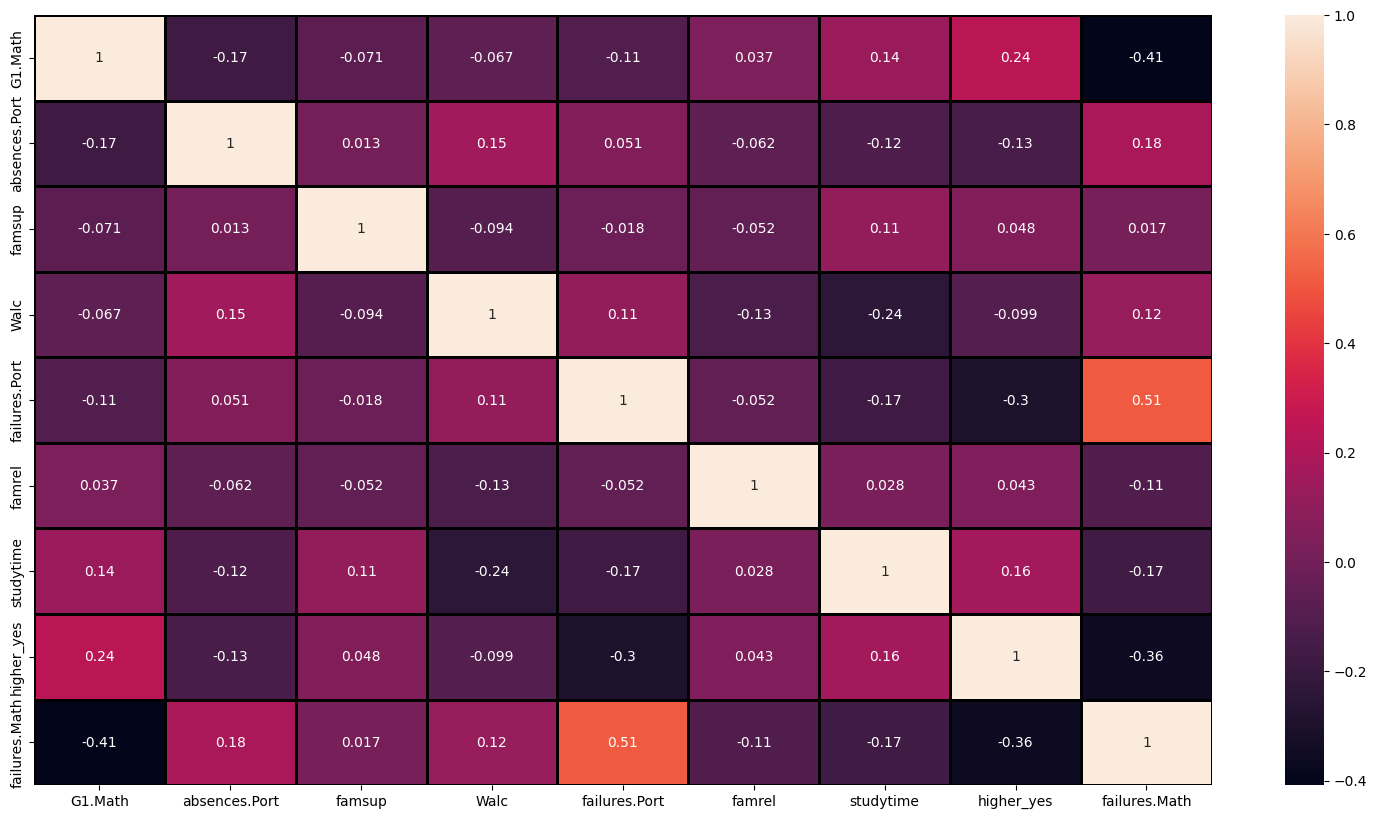

In [249]:
#| label: Get correlation visually
plt.figure(figsize = (19,10))
sns.heatmap(G1Math_df2[['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel','studytime', 'higher_yes','failures.Math', ]].corr(),annot=True, annot_kws={"size": 10}, linewidth=1, linecolor="black")

as you can see , theer are a corrolation between failer.math and the failers.port: 0.51 and G1.math and failer.math corrolation is minus and G1.math and heier_yes has corelation +0.24 .


In [250]:
# Checking the linear correlation of variables
df2=G1Math_df2[['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'studytime','higher_yes','failures.Math', ]]
corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math          1.000000
higher_yes       0.238948
studytime        0.135777
famrel           0.037323
Walc            -0.066664
famsup          -0.070687
failures.Port   -0.109396
absences.Port   -0.174703
failures.Math   -0.408430
Name: G1.Math, dtype: float64

In [251]:
G1Math_df2.columns

Index(['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'failures.Math', 'studytime'],
      dtype='object')

in this step we have 8 variables and they are : 'G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel','higher_yes', 'failures.Math' and the other columns are not use in the model .



**Key Findings**

Positive Correlation: If the correlation coefficient is positive, it indicates a positive linear relationship. As one variable increases, the other tends to increase as well.

Negative Correlation: If the correlation coefficient is negative, it indicates a negative linear relationship. As one variable increases, the other tends to decrease.

Strength of Correlation: The closer the correlation coefficient is to +1 or -1, the stronger the correlation. A value of 0 indicates no linear correlation.

Positive Correlation:

higher_yes:

 There is a positive correlation of approximately 0.23 between 'higher_yes' (desire for higher education) and 'G1.Math'. This suggests that students who express a desire for higher education tend to have higher grades in the first period. The positive correlation indicates that as the likelihood of pursuing higher education increases, so does the performance in the first period.

Walc:

 There is a positive but weak correlation of approximately 0.05 between 'Walc' (weekend alcohol consumption) and 'G1.Math'. This indicates a slight tendency that higher weekend alcohol consumption may be associated with slightly higher grades. While the correlation is positive, it is weak, suggesting that the relationship is not very strong.

famrel:

There is a positive correlation of approximately 0.03 between 'famrel' (quality of family relationships) and 'G1.Math'. This implies that students with better family relationships may have slightly higher grades. The positive correlation suggests that as the quality of family relationships improves, there is a small increase in academic performance.
Negative Correlation:

famsup:

 There is a negative correlation of approximately -0.08 between 'famsup' (family educational support) and 'G1.Math'. This suggests that students who receive more family educational support may have slightly lower grades in the first period. The negative correlation implies that as the level of family educational support increases, there is a small decrease in academic performance.

failures.Port:

 There is a negative correlation of approximately -0.11 between 'failures.Port' (number of past class failures in the Portuguese subject) and 'G1.Math'. This indicates that students with fewer past class failures in the Portuguese subject tend to have higher grades. The negative correlation suggests that a lower history of failures in the Portuguese subject is associated with better academic performance.

absences.Port:

 There is a negative correlation of approximately -0.16 between 'absences.Port' (number of school absences in the Portuguese subject) and 'G1.Math'. This implies that students with fewer school absences may have higher grades. The negative correlation indicates that as the number of school absences decreases, there is a small increase in academic performance.


## 5. Data Analysis (Visualization and checking the distribution of each variable)

### 5.1 Data Modeling


In [252]:
G1Math_df2['G1.Math'].unique()
G1Math_df2['G1.Math'].value_counts()
G1Math_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   G1.Math        948 non-null    int64
 1   absences.Port  948 non-null    int64
 2   famsup         948 non-null    int32
 3   Walc           948 non-null    int64
 4   failures.Port  948 non-null    int64
 5   famrel         948 non-null    int64
 6   higher_yes     948 non-null    int32
 7   failures.Math  948 non-null    int64
 8   studytime      948 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 59.4 KB


Linear Regression:

Description: Linear Regression is a simple and widely used regression algorithm. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

Lasso Regression (L1 Regularization):

Description: Lasso Regression is a linear regression technique with L1 regularization. It adds a penalty term proportional to the absolute values of the coefficients, encouraging sparsity and feature selection.

Ridge Regression (L2 Regularization):

Description: Ridge Regression is another form of linear regression with L2 regularization. It adds a penalty term proportional to the square of the coefficients, preventing overfitting by shrinking the coefficients.

Support Vector Regression (SVR):

Description: Support Vector Regression is a regression algorithm that uses support vector machines to find a hyperplane that best fits the data while minimizing deviations within a specified margin (epsilon).

Random Forest Regressor:

Description: Random Forest is an ensemble method that builds a collection of decision trees and merges their predictions. It provides better accuracy and reduces overfitting compared to a single decision tree.

Neural Network (MLP - Multi-Layer Perceptron):

Description: A Neural Network, specifically MLP, is a type of artificial neural network with multiple layers (input layer, hidden layers, and output layer). It can learn complex patterns and relationships in data.

### 5.2	Model Selection


In [253]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

for using the models we should be have data for testing and training so we create it after check the models and find the mse and r squar and check the perictions , 

***LinearRegression***

In [254]:
G1Math_df2.columns

Index(['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'failures.Math', 'studytime'],
      dtype='object')

In [255]:
# Selecting features and target variable
x = G1Math_df2.drop(['G1.Math' ], axis=1)
y = G1Math_df2['G1.Math']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [256]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8.612957622975609
R-squared: 0.2360891202433797


In [257]:
# Now, we can use the model to make predictions on new data

new_data = pd.DataFrame({
'absences.Port':[0],
 'famsup': [1], 
 'Walc':[2],
 'failures.Port':[0]
 ,'famrel':[3]
 ,'higher_yes':[1],
 'failures.Math' : [2],
 'studytime':[2],
})
# Scaling the features of new_data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Making predictions on the scaled new data
new_predictions = model.predict(new_data_scaled)

# Print or use the new predictions
print("Predictions on new data:")
print(new_predictions)

Predictions on new data:
[5.05281949]


Mean Squared Error (MSE):

The Mean Squared Error is a measure of the average squared difference between the actual and predicted values.
It provides a way to quantify how well the model is predicting the target variable.
A lower MSE indicates better model performance, with zero representing a perfect fit (the predicted values match the actual values).
In this case, an MSE of 8.66 means, on average, the squared difference between the actual and predicted 'G1.Math' values is 8.66. 

R-squared (R2):

R-squared is a measure of how well the independent variables explain the variance in the dependent variable.
It ranges from 0 to 1, where 1 indicates that the model perfectly predicts the dependent variable based on the independent variables.
A higher R2 value suggests a better fit.
In this case, an R2 of 0.23 means that approximately 23% of the variance in 'G1.Math' is explained by the independent variables in this model. The remaining 77% of the variance is not captured by the model. R2 should be interpreted in the context of  specific application, and it's essential to consider other factors like the nature of  data and the complexity of model.

***Lasso***


In [258]:
model = Lasso()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error Lasso: {mse}')
print(f'R-squared Lasso: {r2}')

Mean Squared Error Lasso: 10.9293662038585
R-squared Lasso: 0.030639401998197258


the Lasso model is very bad becouas the r square is too low and the mse is equal 10 

***Predictions on new data Lasso***


In [259]:
new_data = pd.DataFrame({
'absences.Port':[0],
 'famsup': [1], 
 'Walc':[2],
 'failures.Port':[0]
 ,'famrel':[3]
 ,'higher_yes':[1],
 'failures.Math' : [2],
 'studytime':[2],
})
# Scaling the features of new_data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Making predictions on the scaled new data
new_predictions = model.predict(new_data_scaled)

# Print or use the new predictions
print("Predictions on new data Lasso :")
print(new_predictions)

Predictions on new data Lasso :
[11.29732679]


***Ridge***


In [260]:
model = Ridge()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error Lasso: {mse}')
print(f'R-squared Lasso: {r2}')

Mean Squared Error Lasso: 8.618051146588504
R-squared Lasso: 0.23563735927176988


the Rige model the mse is 8.66 and the r-square is 23% 


***Predictions on new data Ridge***


In [261]:
new_data = pd.DataFrame({
'absences.Port':[0],
 'famsup': [1], 
 'Walc':[2],
 'failures.Port':[0]
 ,'famrel':[3]
 ,'higher_yes':[1],
 'failures.Math' : [2],
 'studytime':[2],
})
# Scaling the features of new_data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Making predictions on the scaled new data
new_predictions = model.predict(new_data_scaled)

# Print or use the new predictions
print("Predictions on new data Ridge :")
print(new_predictions)

Predictions on new data Ridge :
[5.10439878]


Predictions on new data Ridge :
[5.76313868]

***SVR***


In [262]:
model = SVR()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error Lasso: {mse}')
print(f'R-squared Lasso: {r2}')

Mean Squared Error Lasso: 9.143160419051926
R-squared Lasso: 0.1890637310414588


the mse : 9 and r squar is 18% and it is not good . 

***Predictions on new data SVR***


In [263]:
new_data = pd.DataFrame({
'absences.Port':[0],
 'famsup': [1], 
 'Walc':[2],
 'failures.Port':[0]
 ,'famrel':[3]
 ,'higher_yes':[1],
 'failures.Math' : [2],
 'studytime':[2],
})
# Scaling the features of new_data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Making predictions on the scaled new data
new_predictions = model.predict(new_data_scaled)

# Print or use the new predictions
print("Predictions on new data SVR :")
print(new_predictions)

Predictions on new data SVR :
[9.21410466]


***RandomForestRegressor***


In [264]:
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error Lasso: {mse}')
print(f'R-squared Lasso: {r2}')

Mean Squared Error Lasso: 3.8218740187569105
R-squared Lasso: 0.6610257159283565


***Predictions on new data RandomForestRegressor***


In [265]:
new_data = pd.DataFrame({
'absences.Port':[0],
 'famsup': [1], 
 'Walc':[2],
 'failures.Port':[0]
 ,'famrel':[3]
 ,'higher_yes':[1],
 'failures.Math' : [2],
 'studytime':[2],
})
# Scaling the features of new_data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Making predictions on the scaled new data
new_predictions = model.predict(new_data_scaled)

# Print or use the new predictions
print("Predictions on new data RandomForestRegressor :")
print(new_predictions)

Predictions on new data RandomForestRegressor :
[6.38]


***MLPRegressor***


In [266]:
model = MLPRegressor()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error MLPRegressor: {mse}')
print(f'R-squared MLPRegressor: {r2}')

Mean Squared Error MLPRegressor: 8.710165404149608
R-squared MLPRegressor: 0.2274674498617988


***Predictions on new data MLPRegressor***


In [267]:
new_data = pd.DataFrame({
'absences.Port':[0],
 'famsup': [1], 
 'Walc':[2],
 'failures.Port':[0]
 ,'famrel':[3]
 ,'higher_yes':[1],
 'failures.Math' : [2],
 'studytime':[2],
})
# Scaling the features of new_data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Making predictions on the scaled new data
new_predictions = model.predict(new_data_scaled)

# Print or use the new predictions
print("Predictions on new data MLPRegressor :")
print(new_predictions)

Predictions on new data MLPRegressor :
[2.37918741]


# Task 2 

Task 2: Bin the target variable G1.Math into 3 categories in such a way that the resulting bins contain roughly equal number of cases. Use this newly created categorical variable as response for a classification model. Again do no tuse any other grade feature and build a model that contains the variables absences.Port, famsup, Walc, failures.Port, studytime, famrel but not the variables Fedu, Medu, age.


In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [269]:
# Select relevant features and the target variable
features = ['absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel','higher_yes','studytime']
target = 'G1.Math'

# Drop unwanted columns
G1Math_df2 = G1Math_df2[features + [target]]

# Bin the target variable into 3 categories
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
G1Math_df2['G1.Math_binned'] = k_bins.fit_transform(G1Math_df2[[target]])

# Select features and the binned target variable for the model
X = G1Math_df2[features]
y = G1Math_df2['G1.Math_binned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier 
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

[[46  4  7]
 [ 6 38  8]
 [ 5  5 71]]
Accuracy: 0.8157894736842105
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        57
         1.0       0.81      0.73      0.77        52
         2.0       0.83      0.88      0.85        81

    accuracy                           0.82       190
   macro avg       0.81      0.80      0.81       190
weighted avg       0.82      0.82      0.81       190



***RandomForestClassifier***


In [270]:
# Create a decision tree classifier 
model = RandomForestClassifier(n_jobs=-1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

[[46  4  7]
 [ 6 38  8]
 [ 4  6 71]]
Accuracy: 0.8157894736842105
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81        57
         1.0       0.79      0.73      0.76        52
         2.0       0.83      0.88      0.85        81

    accuracy                           0.82       190
   macro avg       0.81      0.80      0.81       190
weighted avg       0.82      0.82      0.81       190



***LinearDiscriminantAnalysis***

In [271]:
# Create a decision tree classifier 
model = LinearDiscriminantAnalysis()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

[[12  5 40]
 [ 3  8 41]
 [ 2  3 76]]
Accuracy: 0.5052631578947369
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.21      0.32        57
         1.0       0.50      0.15      0.24        52
         2.0       0.48      0.94      0.64        81

    accuracy                           0.51       190
   macro avg       0.56      0.43      0.40       190
weighted avg       0.55      0.51      0.43       190



***KNeighborsClassifier***

In [272]:
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(cm)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

[[34 12 11]
 [ 7 33 12]
 [12 13 56]]
Accuracy: 0.6473684210526316
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62        57
         1.0       0.57      0.63      0.60        52
         2.0       0.71      0.69      0.70        81

    accuracy                           0.65       190
   macro avg       0.64      0.64      0.64       190
weighted avg       0.65      0.65      0.65       190



after categorise the model we can use the clasification models an they help us to better accuracy . for example we have 82% accuracy in model RandomForestclassifier was shown.

I chack the models again by k-fold for finding better diffrencial result :  


In [273]:



# Selecting features and target variable
x = G1Math_df2.drop(['G1.Math' ], axis=1)
y = G1Math_df2['G1.Math']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Defining classification models
models = [
    ('LR', LogisticRegression(n_jobs=-1)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier()),
    ('RFM', RandomForestClassifier(n_jobs=-1))
]

# 10-fold cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.430070 (0.056090)
LDA: 0.171439 (0.062116)
KNN: 0.544825 (0.050729)
DTC: 0.795421 (0.046306)
RFM: 0.803333 (0.051045)
